In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('G:\\Mi unidad\\DATA SCIENCE\\PYNTHON\\VSC\\github\\data\\train\\train.csv')
data 

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13898,2012-08-07,3,1,8,7,0,2,1,2,0.70,0.6667,0.74,0.1343,502
13899,2012-08-07,3,1,8,8,0,2,1,2,0.70,0.6515,0.70,0.1642,705
13900,2012-08-07,3,1,8,9,0,2,1,2,0.70,0.6667,0.74,0.1343,327
13901,2012-08-07,3,1,8,10,0,2,1,2,0.74,0.6970,0.70,0.1343,250


In [3]:
# Convertir la columna 'dteday' a tipo datetime y establecerla como índice
data['dteday'] = pd.to_datetime(data['dteday'])
data.set_index('dteday', inplace=True)

# Reemplazar valores numéricos por etiquetas descriptivas
data['yr'].replace({0:'2011', 1:'2012'}, inplace=True)
data['mnth'].replace({
    1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril',
    5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto',
    9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'
}, inplace=True)
data['workingday'].replace({0:'Día_No_Laborable', 1:'Día_Laborable'}, inplace=True)
data['holiday'].replace({0:'No_Feriado', 1:'Feriado'}, inplace=True)
data['weekday'].replace({
    0:'Domingo', 1:'Lunes', 2:'Martes', 3:'Miércoles',
    4:'Jueves', 5:'Viernes', 6:'Sábado'
}, inplace=True)
data['weathersit'].replace({
    1:'Despejado',
    2:'Niebla_Nublado',
    3:'Lluvia_Nieve_Ligera',
    4:'Lluvia_Nieve_Intensa'
}, inplace=True)
data['season'].replace({
    1:'Invierno',
    2:'Primavera',
    3:'Verano',
    4:'Otoño'
}, inplace=True)

# Agrupar horas del día
def hour_group(h):
    if 0 <= h <= 5:
        return 'Madrugada'
    elif 6 <= h <= 11:
        return 'Mañana'
    elif 12 <= h <= 17:
        return 'Tarde'
    else:
        return 'Noche_Tarde'

data['hr'] = data['hr'].apply(hour_group)


In [4]:
categorias = data.select_dtypes(include=['object']).columns.to_list()

data[categorias] = data[categorias].astype('category')

cat_orders = {
    'season': ['Invierno', 'Primavera', 'Verano', 'Otoño'],
    'yr': ['2011', '2012'],
    'mnth': ['Enero','Febrero','Marzo','Abril','Mayo','Junio',
             'Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'],
    'hr': ['Madrugada', 'Mañana', 'Tarde', 'Noche_Tarde'],  # si quieres otro orden me dices
    'holiday': ['No_Feriado', 'Feriado'],
    'weekday': ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'],
    'workingday': ['Día_No_Laborable', 'Día_Laborable'],
    'weathersit': ['Despejado', 'Niebla_Nublado', 'Lluvia_Nieve_Ligera', 'Lluvia_Nieve_Intensa']
}

# --- APLICAR ORDEN Y CONVERTIR A CATEGORÍA ---
for col, order in cat_orders.items():
    data[col] = pd.Categorical(data[col], categories=order, ordered=True)

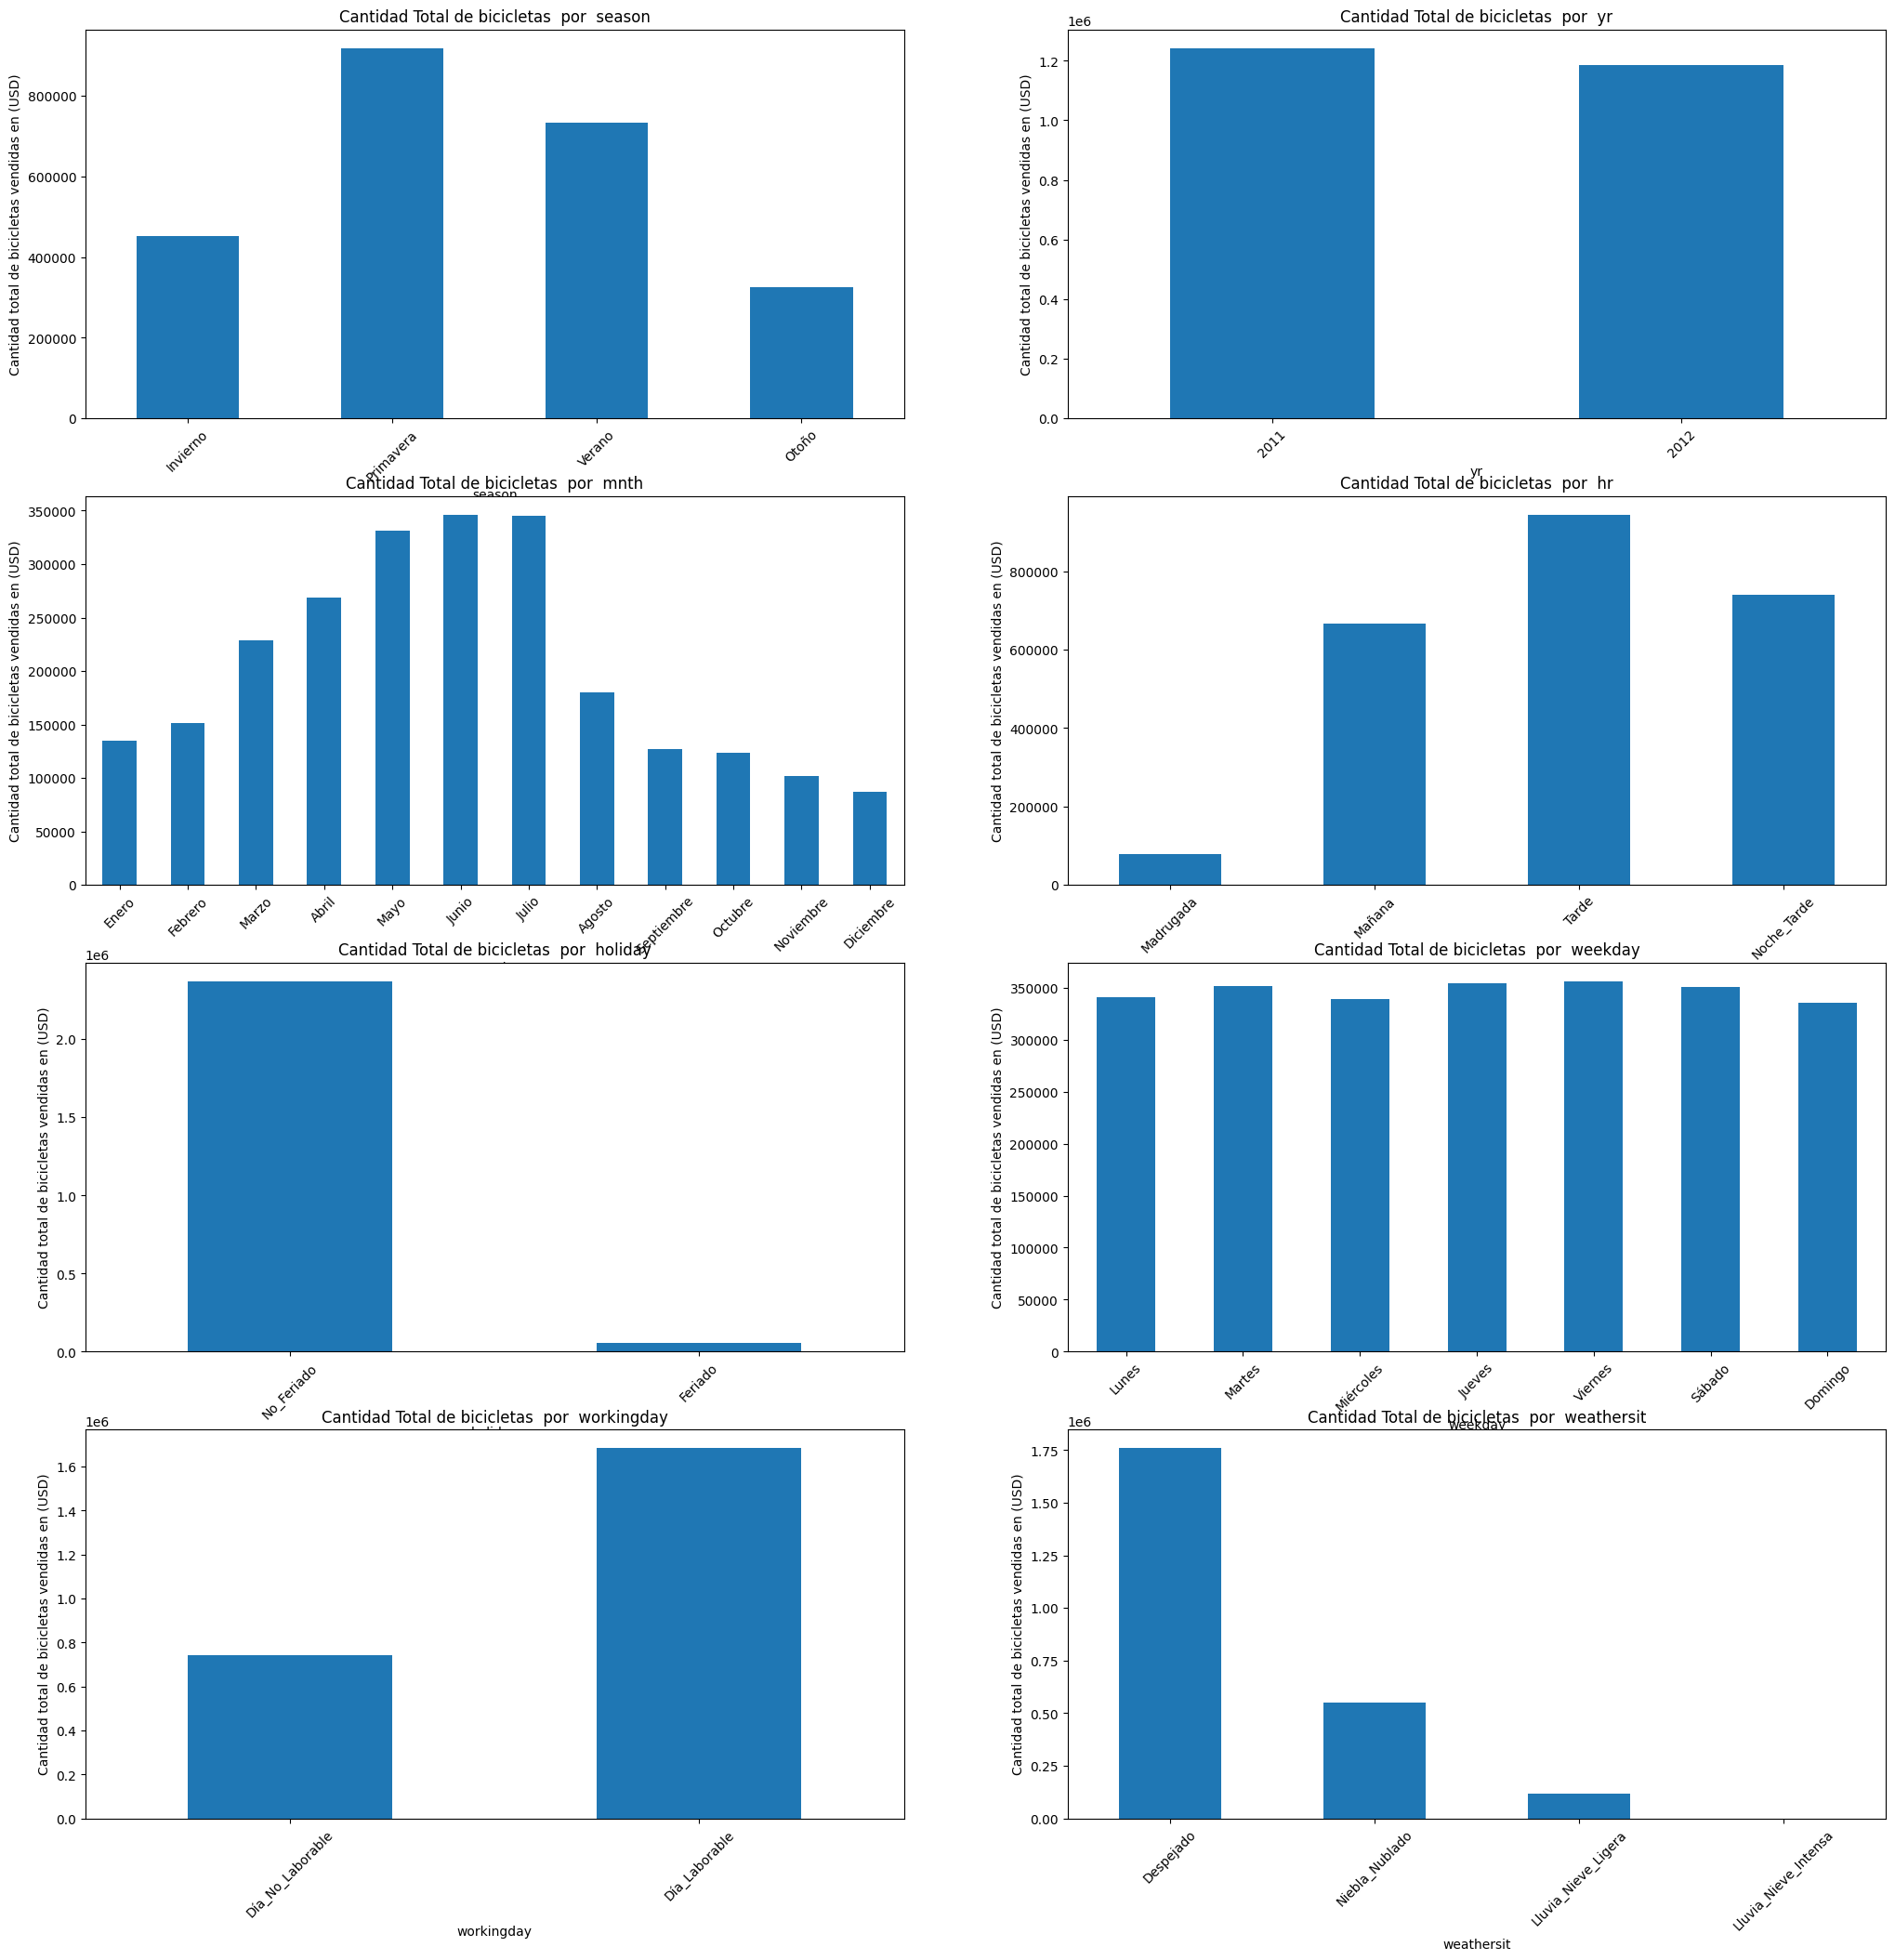

In [5]:


# Haremos un lienzo de gráficos de 4 x 2 de para graficos de barras
# El eje x será cada una de las variables categóricas y el eje y es mean 'cnt'

fig, axes = plt.subplots(4, 2, figsize=(25, 25))
for i, categoria in enumerate(categorias):
    ax = axes[i // 2, i % 2]
    data.groupby(categoria)['cnt'].sum().plot(kind='bar', ax=ax)
    ax.set_title(f'Cantidad Total de bicicletas  por  {categoria}')
    ax.set_xlabel(categoria)
    ax.set_ylabel('Cantidad total de bicicletas vendidas en (USD)')
    ax.tick_params(axis='x', rotation=45)

In [14]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.24,0.2879,0.81,0.0000,16
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.22,0.2727,0.80,0.0000,40
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.22,0.2727,0.80,0.0000,32
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.24,0.2879,0.75,0.0000,13
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-07,Verano,2012,Agosto,Mañana,No_Feriado,Martes,Día_Laborable,Niebla_Nublado,0.70,0.6667,0.74,0.1343,502
2012-08-07,Verano,2012,Agosto,Mañana,No_Feriado,Martes,Día_Laborable,Niebla_Nublado,0.70,0.6515,0.70,0.1642,705
2012-08-07,Verano,2012,Agosto,Mañana,No_Feriado,Martes,Día_Laborable,Niebla_Nublado,0.70,0.6667,0.74,0.1343,327


In [15]:
data.to_csv('G:\\Mi unidad\\DATA SCIENCE\\PYNTHON\\VSC\\github\\data\\train\\train_limpio.csv', index=True)